[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Saving Product_Reviews.csv to Product_Reviews (1).csv
Index(['Product ID', 'Product Review', 'Sentiment'], dtype='object')


,proportion
Sentiment,
POSITIVE,0.845771
NEUTRAL,0.080597
NEGATIVE,0.073632


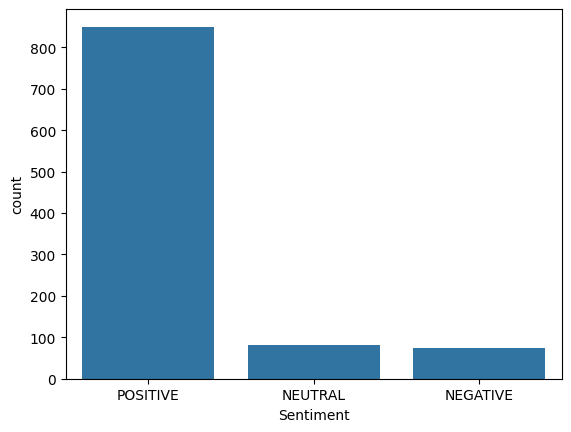

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', None)

import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from nltk.stem.porter import PorterStemmer

from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.model_selection import GridSearchCV
from google.colab import files
uploaded = files.upload()


df=pd.read_csv('/content/Product_Reviews.csv')
df.head()

df = df.drop_duplicates()

df.duplicated().sum()
print(df.columns)
sns.countplot(data=df, x='Sentiment')
plt.show


In [ ]:
df['Sentiment'].value_counts(normalize=True)

,proportion
Sentiment,
POSITIVE,0.845771
NEUTRAL,0.080597
NEGATIVE,0.073632


In [ ]:
def remove_special_characters(text):
  pattern='[^A-Za-z0-9]+'

  new_text=''.join(re.sub(pattern,' ', text))
  return new_text


In [ ]:
df['cleaned_text']=df['Product Review'].apply(remove_special_characters)

In [ ]:
df.loc[0:3, ['Product Review','cleaned_text']]

,Product Review,cleaned_text
0,"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about customs, which I may have if I used a third party shipping service.",I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing the paperwhite is great but if you have spending money go for the voyage Fortunately I had friends who owned each so I ended up buying the paperwhite on this basis both models now have 300 ppi so the 80 dollar jump turns out pricey the voyage s page press isn t always sensitive and if you are fine with a specific setting you don t need auto light adjustment It s been a week and I am loving my paperwhite no regrets The touch screen is receptive and easy to use and I keep the light at a specific setting regardless of the time of day In any case it s not hard to change the setting either as you ll only be changing the light level at a certain time of day not every now and then while reading Also glad that I went for the international shipping option with Amazon Extra expense but delivery was on time with tracking and I didnt need to worry about customs which I may have if I used a third party shipping service
1,"Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simple Touch from 2011. I've read the Harry Potter series, Girl with the Dragon Tattoo series, 1984, Brave New World, and a few other key titles. Fair to say my Nook did not get as much use as many others may have gotten from theirs.Fast forward to today. I have had a full week with my new Kindle Paperwhite and I have to admit, I'm in love. Not just with the Kindle, but with reading all over again! Now let me relate this review, love, and reading all back to the Kindle. The investment of 139.00 is in the experience you will receive when you buy a Kindle. You are not simply paying for a screen there is an entire experience included in buying from Amazon.I have been reading The Hunger Games trilogy and shall be moving onto the Divergent series soon after. Here is the thing with the Nook that hindered me for the past 4 years: I was never inspired to pick it up, get it into my hands, and just dive in. There was never that feeling of oh man, reading on this thing is so awesome. However, with my Paperwhite, I now have that feeling! That desire is back and I simply adore my Kindle. If you are considering purchasing one, stop thinking about it simply go for it. After a full week, 3 downloaded books, and a ton of reading, I still have half of my battery left as well.Make yourself happy. Inspire the reader inside of you.",Allow me to preface this with a little history I am was a casual reader who owned a Nook Simple Touch from 2011 I ve read the Harry Potter series Girl with the Dragon Tattoo series 1984 Brave New World and a few other key titles Fair to say my Nook did not get as much use as many others may have gotten from theirs Fast forward to today I have had a full week with my new Kindle Paperwhite and I have to admit I m in love Not just w

from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Product Review').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('cleaned_text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df['cleaned_text']= df['cleaned_text'].str.lower()

In [ ]:
df.loc[0:3, ['Product Review','cleaned_text']]

,Product Review,cleaned_text
0,"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about customs, which I may have if I used a third party shipping service.",i initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing the paperwhite is great but if you have spending money go for the voyage fortunately i had friends who owned each so i ended up buying the paperwhite on this basis both models now have 300 ppi so the 80 dollar jump turns out pricey the voyage s page press isn t always sensitive and if you are fine with a specific setting you don t need auto light adjustment it s been a week and i am loving my paperwhite no regrets the touch screen is receptive and easy to use and i keep the light at a specific setting regardless of the time of day in any case it s not hard to change the setting either as you ll only be changing the light level at a certain time of day not every now and then while reading also glad that i went for the international shipping option with amazon extra expense but delivery was on time with tracking and i didnt need to worry about customs which i may have if i used a third party shipping service
1,"Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simple Touch from 2011. I've read the Harry Potter series, Girl with the Dragon Tattoo series, 1984, Brave New World, and a few other key titles. Fair to say my Nook did not get as much use as many others may have gotten from theirs.Fast forward to today. I have had a full week with my new Kindle Paperwhite and I have to admit, I'm in love. Not just with the Kindle, but with reading all over again! Now let me relate this review, love, and reading all back to the Kindle. The investment of 139.00 is in the experience you will receive when you buy a Kindle. You are not simply paying for a screen there is an entire experience included in buying from Amazon.I have been reading The Hunger Games trilogy and shall be moving onto the Divergent series soon after. Here is the thing with the Nook that hindered me for the past 4 years: I was never inspired to pick it up, get it into my hands, and just dive in. There was never that feeling of oh man, reading on this thing is so awesome. However, with my Paperwhite, I now have that feeling! That desire is back and I simply adore my Kindle. If you are considering purchasing one, stop thinking about it simply go for it. After a full week, 3 downloaded books, and a ton of reading, I still have half of my battery left as well.Make yourself happy. Inspire the reader inside of you.",allow me to preface this with a little history i am was a casual reader who owned a nook simple touch from 2011 i ve read the harry potter series girl with the dragon tattoo series 1984 brave new world and a few other key titles fair to say my nook did not get as much use as many others may have gotten from theirs fast forward to today i have had a full week with my new kindle paperwhite and i have to admit i m in love not just w

In [ ]:
df['cleaned_text']=df['cleaned_text'].str.strip()

In [ ]:
df.loc[0:3, ['Product Review','cleaned_text']]

,Product Review,cleaned_text
0,"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about customs, which I may have if I used a third party shipping service.",i initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing the paperwhite is great but if you have spending money go for the voyage fortunately i had friends who owned each so i ended up buying the paperwhite on this basis both models now have 300 ppi so the 80 dollar jump turns out pricey the voyage s page press isn t always sensitive and if you are fine with a specific setting you don t need auto light adjustment it s been a week and i am loving my paperwhite no regrets the touch screen is receptive and easy to use and i keep the light at a specific setting regardless of the time of day in any case it s not hard to change the setting either as you ll only be changing the light level at a certain time of day not every now and then while reading also glad that i went for the international shipping option with amazon extra expense but delivery was on time with tracking and i didnt need to worry about customs which i may have if i used a third party shipping service
1,"Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simple Touch from 2011. I've read the Harry Potter series, Girl with the Dragon Tattoo series, 1984, Brave New World, and a few other key titles. Fair to say my Nook did not get as much use as many others may have gotten from theirs.Fast forward to today. I have had a full week with my new Kindle Paperwhite and I have to admit, I'm in love. Not just with the Kindle, but with reading all over again! Now let me relate this review, love, and reading all back to the Kindle. The investment of 139.00 is in the experience you will receive when you buy a Kindle. You are not simply paying for a screen there is an entire experience included in buying from Amazon.I have been reading The Hunger Games trilogy and shall be moving onto the Divergent series soon after. Here is the thing with the Nook that hindered me for the past 4 years: I was never inspired to pick it up, get it into my hands, and just dive in. There was never that feeling of oh man, reading on this thing is so awesome. However, with my Paperwhite, I now have that feeling! That desire is back and I simply adore my Kindle. If you are considering purchasing one, stop thinking about it simply go for it. After a full week, 3 downloaded books, and a ton of reading, I still have half of my battery left as well.Make yourself happy. Inspire the reader inside of you.",allow me to preface this with a little history i am was a casual reader who owned a nook simple touch from 2011 i ve read the harry potter series girl with the dragon tattoo series 1984 brave new world and a few other key titles fair to say my nook did not get as much use as many others may have gotten from theirs fast forward to today i have had a full week with my new kindle paperwhite and i have to admit i m in love not just w

In [ ]:
def remove_stopwords(text):
  words=text.split()
  new_text=' '.join([word for word in words if word not in stopwords.words('english')])
  return new_text

In [ ]:
df['cleaned_text_without_stopwords']=df['cleaned_text'].apply(remove_stopwords)

In [ ]:
df['cleaned_text_without_stopwords']

,cleaned_text_without_stopwords
0,initially trouble deciding paperwhite voyage reviews less said thing paperwhite great spending money go voyage fortunately friends owned ended buying paperwhite basis models 300 ppi 80 dollar jump turns pricey voyage page press always sensitive fine specific setting need auto light adjustment week loving paperwhite regrets touch screen receptive easy use keep light specific setting regardless time day case hard change setting either changing light level certain time day every reading also glad went international shipping option amazon extra expense delivery time tracking didnt need worry customs may used third party shipping service
1,allow preface little history casual reader owned nook simple touch 2011 read harry potter series girl dragon tattoo series 1984 brave new world key titles fair say nook get much use many others may gotten fast forward today full week new kindle paperwhite admit love kindle reading let relate review love reading back kindle investment 139 00 experience receive buy kindle simply paying screen entire experience included buying amazon reading hunger games trilogy shall moving onto divergent series soon thing nook hindered past 4 years never inspired pick get hands dive never feeling oh man reading thing awesome however paperwhite feeling desire back simply adore kindle considering purchasing one stop thinking simply go full week 3 downloaded books ton reading still half battery left well make happy inspire reader inside
2,enjoying far great reading original fire since 2012 fire used make eyes hurt read long experienced paperwhite yet
3,bought one first paperwhites pleased constant companion suppose ive read average book every three days past however many years wouldnt give youd pry cold dead fingers sundry logistical reasons ive also made good use amazons kindle app iphone paperwhite screen naturally cool usability delivers works well attractions companion kindle course aspects paperwhite would like critique ah knew coming somewhere didnt member bookbub get daily list alerts book deals chosen genres take many however ive found even best world cant keep days seems every book read ive bought two theres much good stuff accumulative effect number books actually paperwhite creeping ever upward time 400 mind ive noticed page turning remained exactly every action kindle become positively glacial slow slow think malfunctioning general consensus appears expected one many books downloaded onto kindle begin behave flakey manner drives mad amazon states hold thousands books believe figure would need second paperwhite read im waiting actions complete first one read
4,say upfront like coroporate hermetically closed stuff like anything apple case amazon like devices put anything want use fairly happy user nook touch several years use functionalities since live serbia lost nook since devices actually fully used serbia buying books using online capabilities except kindle since one except amazon ships serbia since actually happy amazon customer since 2005 friends accounts since 2007 since kindle definitely best technology buy itso read many reviews screen light paperwhite similar devices problem mine light disperses fine except black blotches maybe see picture bottom screen actually shadows black plastic casing thus really avoided see picture without light blotches light paperwhite screen marvelous 300 ppi touchscreen works fine store works serbia two days using happy guy get hang make sideloaded books behave least almost like amazon books fine one thing like see amazon future upgrades make kindle treat sideloaded books like ones bought directly sharing funcion quotes goodreads enabled size perfect sits well hand light hurt eyes dark like light tab packaging fine problems remains seen battery life far recommend
...,...
1002,remote got alexa echo control volume think remotes used feature volume pause would disappointed produced remote control volume would make incompetent engineer lazy

In [ ]:
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
words=["running","studies","flies","easily","happiness"]
for word in words:
  print(f"(word)+ {stemmer.stem(word)}")

(word)+ run
(word)+ studi
(word)+ fli
(word)+ easili
(word)+ happi


In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
from nltk.corpus import wordnet
import nltk
nltk.download('wordnet')
nltk.download('onw-1.4')
lemmatizer=WordNetLemmatizer()
words=["running","studies","flies","easily","better","happiness"]
for word in words:
  print(f"(word)+ {lemmatizer.lemmatize(word)}")


(word)+ running
(word)+ study
(word)+ fly
(word)+ easily
(word)+ better
(word)+ happiness


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading onw-1.4: Package 'onw-1.4' not found in
[nltk_data]     index


In [ ]:
import spacy
nlp=spacy.load("en_core_web_sm")
doc=nlp("running studies flies better happiness")
for token in doc:
  print(f"{token.text} ({token.pos_})->{token.lemma}")

running (VERB)->12767647472892411841
studies (NOUN)->4251533498015236010
flies (VERB)->1551516756674911027
better (ADJ)->4525988469032889948
happiness (NOUN)->2779265004918961325


In [ ]:
import pandas as pd
import string
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import nltk
from google.colab import files

nltk.download('stopwords')

uploaded = files.upload()

df = pd.read_csv('/content/Product_Reviews.csv')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

df['cleaned_text_without_stopwords'] = df['Product Review'].apply(clean_text)

bow_vec = CountVectorizer(max_features=1000)
df_features_BOW = bow_vec.fit_transform(df['cleaned_text_without_stopwords'])
df_features_BOW = df_features_BOW.toarray()

words = bow_vec.get_feature_names_out()
print("Shape of BOW:", df_features_BOW.shape)
print("First 10 words:", words[:10])

df_BOW = pd.DataFrame(df_features_BOW, columns=words)
df_BOW.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Saving Product_Reviews.csv to Product_Reviews.csv
Shape of BOW: (1007, 1000)
First 10 words: ['10' '100' '139' '15' '16level' '20' '2013' '2014' '2015' '2nd']


,10,100,139,15,16level,20,2013,2014,2015,2nd,...,write,writing,wrong,year,years,yes,yet,youll,youre,youtube
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=1000)
data_features_tfidf=tfidf.fit_transform(df['cleaned_text_without_stopwords'])
data_features_tfidf=data_features_tfidf.toarray()
print("shape of the feature vector",data_features_tfidf.shape)
words=tfidf.get_feature_names_out()
print("first 10 words",words[:10])
print("last 10 words"[10:])
df_tfidf=pd.DataFrame(data_features_tfidf, columns=tfidf.get_feature_names_out())
df_tfidf.head()


shape of the feature vector (1007, 1000)
first 10 words ['10' '100' '139' '15' '16level' '20' '2013' '2014' '2015' '2nd']
rds


,10,100,139,15,16level,20,2013,2014,2015,2nd,...,write,writing,wrong,year,years,yes,yet,youll,youre,youtube
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.139439,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.072328,0.0,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.288218,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.070352,0.0,0.000000,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.054600,0.0,0.000000,0.000000,0.0,0.0


In [ ]:
ngram = CountVectorizer(max_features=1000,ngram_range=(1,2))
data_features_ngram=ngram.fit_transform(df['cleaned_text_without_stopwords'])
data_features_ngram=data_features_ngram.toarray()
print("shape of the feature vector",data_features_ngram.shape)
words=ngram.get_feature_names_out()
print("first 10 words",words[:10])
print("last 10 words"[10:])
df_ngram=pd.DataFrame(data_features_ngram, columns=ngram.get_feature_names_out())
df_ngram.head()

shape of the feature vector (1007, 1000)
first 10 words ['10' '100' '15' '20' '2013' '2014' '2015' '2nd' '30' '300']
rds


,10,100,15,20,2013,2014,2015,2nd,30,300,...,year,year old,years,years model,yes,yet,youll,youre,youre reading,youtube
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


bow_vec = CountVectorizer(max_features=1000)
df_features_BOW = bow_vec.fit_transform(df['cleaned_text_without_stopwords'])
df_BOW = pd.DataFrame(df_features_BOW.toarray(), columns=bow_vec.get_feature_names_out())

tfidf = TfidfVectorizer(max_features=1000)
data_features_tfdif = tfidf.fit_transform(df['cleaned_text_without_stopwords'])
df_tfidf = pd.DataFrame(data_features_tfdif.toarray(), columns=tfidf.get_feature_names_out())


vectorized_datasets = [
    ("BoW", df_BOW),
    ("TF-IDF", df_tfidf),
    ("N-gram", df_ngram)
]


y = df['Sentiment']


results = []


for name, X in vectorized_datasets:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


    rf_model = RandomForestClassifier(random_state=100)
    rf_model.fit(X_train, y_train)
    rf_preds = rf_model.predict(X_test)
    rf_f1 = f1_score(y_test, rf_preds, average='macro')
    results.append((f"RandomForest - {name}", rf_f1, rf_model, X_test, y_test, rf_preds))


    nb_model = MultinomialNB()
    nb_model.fit(X_train, y_train)
    nb_preds = nb_model.predict(X_test)
    nb_f1 = f1_score(y_test, nb_preds, average='macro')
    results.append((f"NaiveBayes - {name}", nb_f1, nb_model, X_test, y_test, nb_preds))


results.sort(key=lambda x: x[1], reverse=True)


print("\n Model Performance (Macro F1-scores):\n")
for label, f1_score_val, _, _, _, _ in results:
    print(f"{label:30s}: Macro F1 = {f1_score_val:.4f}")


 Model Performance (Macro F1-scores):

NaiveBayes - N-gram           : Macro F1 = 0.5664
NaiveBayes - BoW              : Macro F1 = 0.5590
RandomForest - BoW            : Macro F1 = 0.5006
RandomForest - N-gram         : Macro F1 = 0.5006
RandomForest - TF-IDF         : Macro F1 = 0.4979
NaiveBayes - TF-IDF           : Macro F1 = 0.3339



Best Model: NaiveBayes - N-gram with Macro F1 = 0.5664
Classification Report:

              precision    recall  f1-score   support

    NEGATIVE       0.62      0.56      0.59        18
     NEUTRAL       0.22      0.21      0.22        19
    POSITIVE       0.89      0.90      0.89       165

    accuracy                           0.81       202
   macro avg       0.58      0.56      0.57       202
weighted avg       0.80      0.81      0.80       202



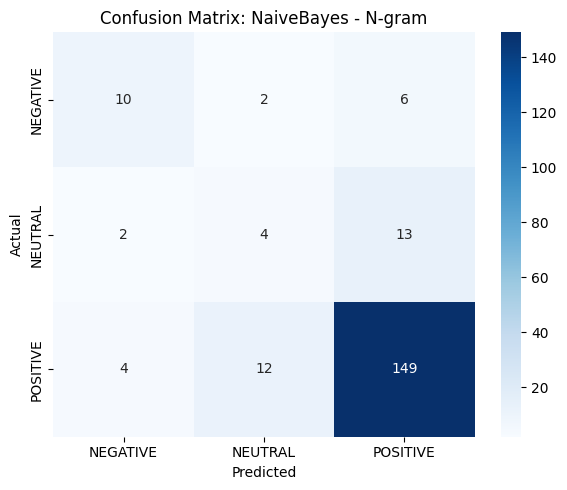

In [ ]:
best_model_label, best_f1, best_model, X_test_best, y_test_best, y_pred_best = results[0]
print(f"\nBest Model: {best_model_label} with Macro F1 = {best_f1:.4f}")
print("Classification Report:\n")
print(classification_report(y_test_best, y_pred_best))

cm=confusion_matrix(y_test_best, y_pred_best, labels=best_model.classes_)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title(f"Confusion Matrix: {best_model_label}")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()